# Linear Regression Model

In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# นำเข้าข้อมูล

In [180]:
# นำเข้าข้อมูลจากไฟล์ CSV
data = pd.read_csv('DataComsci.csv')
# ดูตัวอย่างข้อมูล
print(data.describe())

print(data.columns.tolist())

data

       GRADUATEYEAR     STUDENTID  GPAgraduate
count    343.000000  3.430000e+02   343.000000
mean    2564.303207  1.002616e+08     2.610554
std        1.389672  1.621539e+04     0.413158
min     2562.000000  1.002056e+08     2.000000
25%     2563.000000  1.002492e+08     2.310000
50%     2564.000000  1.002611e+08     2.540000
75%     2566.000000  1.002712e+08     2.815000
max     2566.000000  1.002872e+08     3.970000
['GRADUATEYEAR', 'STUDENTID', 'CalculusforScience', 'FundamentalsOfProgramming', 'HistoryAndDevelopmentOfComputerTechnology', 'MathematicsForScience', 'ObjectOrientedProgramming', 'ThaiLanguageSkills', 'PoliticsEconomyandSociety', 'PhilosophyOfScience', 'ManAndEnvironment', 'LifeSkills', 'LanguageSocietyAndCulture', 'EnglishCriticalReadingForEffectiveCommunication', 'ComputerArchitecture', 'DataStructure', 'DatabaseSystems', 'DiscreteMathematicsForComputerScience', 'LinearAlgebraAndApplications', 'OperatingSystems', 'StatisticalAnalysis', 'EnglishWritingForEffectiveCommu

,GRADUATEYEAR,STUDENTID,CalculusforScience,FundamentalsOfProgramming,HistoryAndDevelopmentOfComputerTechnology,MathematicsForScience,ObjectOrientedProgramming,ThaiLanguageSkills,PoliticsEconomyandSociety,PhilosophyOfScience,...,IntroductionToRobotics,LifeAndHealth,LifePrivacy,MultimediaApplicationDevelopment,MusicStudiesInThaiCulture,ProgrammingLanguages,Seminar,SpecialTopicsInComputerScience,SystemAnalysisAndDesign,GPAgraduate
0,2562,100205568,D+,B+,NaN,C+,D,C+,C,C+,...,NaN,NaN,NaN,NaN,NaN,D,B,NaN,C+,2.10
1,2562,100205606,D,B+,NaN,D+,D,C,NaN,C+,...,NaN,B+,NaN,NaN,C,D,C+,NaN,C,2.00
2,2564,100215265,F,B,NaN,D+,D+,C,C+,C+,...,NaN,NaN,NaN,NaN,NaN,D,B,C+,C,2.01
3,2562,100225543,F,C+,NaN,F,D,C+,NaN,C+,...,NaN,NaN,NaN,B,B+,D,B,C,C+,2.10
4,2565,100225544,F,C+,NaN,F,C,B,NaN,C+,...,B,NaN,NaN,NaN,C+,C,B,NaN,C,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2566,100282344,D,D+,A,D,D,NaN,NaN,NaN,...,NaN,A,NaN,NaN,NaN,NaN,A,NaN,D+,2.34
339,2566,100282356,C+,C,A,A,B+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,NaN,A,NaN,B+,3.19
340,2566,100282359,C,C,A,D+,C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,NaN,A,NaN,C+,2.68
341,2566,100282360,D,C,A,D,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,C,2.52


# ขั้นตอนที่ 1: เตรียมข้อมูล

In [181]:
# แปลงเกรดเป็นค่าตัวเลข
grade_mapping = {'A': 4.0, 'B+': 3.5, 'B': 3.0, 'C+': 2.5, 'C': 2.0, 'D+': 1.5, 'D': 1.0, 'F': 0.0}
data.replace(grade_mapping, inplace=True)

print(data)

# แทนค่าที่หายไปด้วยค่าเฉลี่ยของแต่ละคอลัมน์สำหรับคอลัมน์ตัวเลข
data.fillna(data.mean(numeric_only=True), inplace=True)

# เลือกฟีเจอร์ที่เกี่ยวข้อง (รายวิชาที่จะใช้ทำนาย GPA)
features = [
        'CalculusforScience', 'FundamentalsOfProgramming', 'HistoryAndDevelopmentOfComputerTechnology',
        'MathematicsForScience', 'ObjectOrientedProgramming', 'ThaiLanguageSkills',
        'PoliticsEconomyandSociety', 'PhilosophyOfScience', 'ManAndEnvironment',
        'LifeSkills', 'LanguageSocietyAndCulture', 'EnglishCriticalReadingForEffectiveCommunication',
        'ComputerArchitecture', 'DataStructure', 'DatabaseSystems',
        'DiscreteMathematicsForComputerScience', 'LinearAlgebraAndApplications',
        'OperatingSystems', 'StatisticalAnalysis', 'EnglishWritingForEffectiveCommunication',
        'AlgorithmDesignandAnalysis', 'ArtificialIntelligence', 'ComputerNetworkAndDataCommunication',
        'Seminar', 'SoftwareEngineering', 'DataMiningTechniques', 
        'MobileApplicationDevelopment', 'MultimediaAnd WebTechnology', 
        'SensingAndActuationForInternetOfThings','SystemAnalysisAndDesign'
]  # แทนที่ด้วยรายชื่อฟีเจอร์ที่คุณต้องการ

X = data[features]  # สร้าง DataFrame สำหรับฟีเจอร์

# แปลงฟีเจอร์ที่เป็นประเภทข้อความ (categorical) ถ้ามี
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    # ลบค่า NaN และตรวจสอบให้แน่ใจว่าคอลัมน์มีประเภทข้อมูลเป็นข้อความอย่างเดียว
    if X[col].isnull().all():  # ตรวจสอบว่าคอลัมน์เป็น NaN ทั้งหมด
        continue
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # แปลงเป็นสตริงเพื่อหลีกเลี่ยงประเภทข้อมูลผสม
        label_encoders[col] = le

# ตัวแปรเป้าหมาย (GPA)
y = data['GPAgraduate']

     GRADUATEYEAR  STUDENTID  CalculusforScience  FundamentalsOfProgramming  \
0            2562  100205568                 1.5                        3.5   
1            2562  100205606                 1.0                        3.5   
2            2564  100215265                 0.0                        3.0   
3            2562  100225543                 0.0                        2.5   
4            2565  100225544                 0.0                        2.5   
..            ...        ...                 ...                        ...   
338          2566  100282344                 1.0                        1.5   
339          2566  100282356                 2.5                        2.0   
340          2566  100282359                 2.0                        2.0   
341          2566  100282360                 1.0                        2.0   
342          2565  100287192                 0.0                        2.5   

     HistoryAndDevelopmentOfComputerTechnology  Mat

### ตรวจสอบขนาดของ X และ y

In [182]:
print(X.shape)
print(y.shape)

(343, 30)
(343,)


# ขั้นตอนที่ 2: แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ขั้นตอนที่ 3: สร้างโมเดล Linear Regression และฝึกสอน

In [184]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# ขั้นตอนที่ 4: ประเมินผลโมเดล

In [185]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # คำนวณ Mean Squared Error
r2 = r2_score(y_test, y_pred)  # คำนวณ R-Squared
rmse = np.sqrt(mse) # คำนวณ RMSE
correlation = np.corrcoef(y_test, y_pred)[0, 1] # คำนวณค่าสหสัมพันธ์

# แสดงค่า weights และ intercept
weights = model.coef_  # ค่าน้ำหนัก
intercept = model.intercept_  # ค่าตัดแกน


# แสดงผลลัพธ์

In [186]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared: {r2}')
print("RMSE:", rmse)
print("Correlation coefficient:", correlation)
print('')

print(f'Weights:, {weights}')
print(f'Intercept:, {intercept}')

Mean Squared Error (MSE): 0.008760694535345524
R-Squared: 0.9331476432989072
RMSE: 0.09359858190883837
Correlation coefficient: 0.96742052816114

Weights:, [ 0.0380193   0.00222023  0.04449637  0.01510391  0.02171314  0.06036888
  0.03131023 -0.02479018  0.05637927  0.01471301  0.05071988  0.04852434
  0.05004235  0.02637917  0.04442335  0.02378776  0.04357841  0.05555757
  0.03763548  0.05913011  0.0489694   0.03828682  0.0282963   0.02473871
  0.05804469  0.01783916  0.01002173  0.03039675  0.03676412  0.0412522 ]
Intercept:, -0.1339277477575851


# กราฟแสดงผล

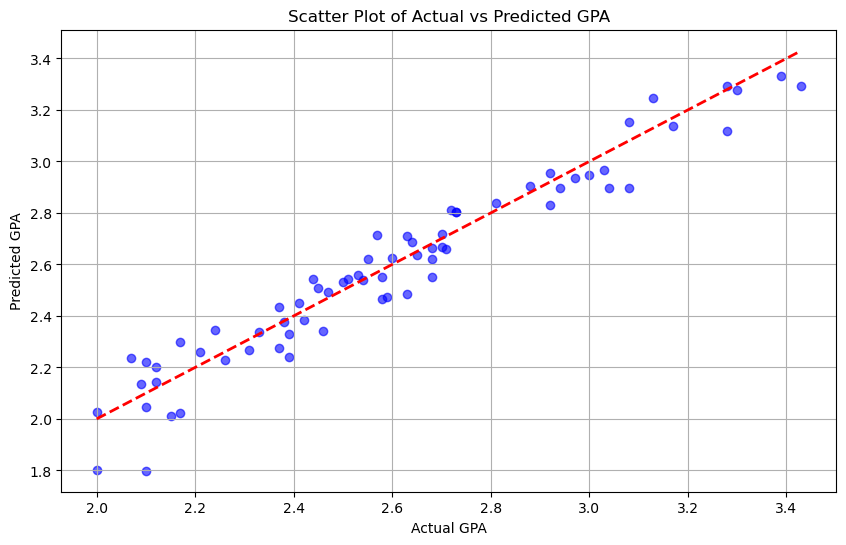

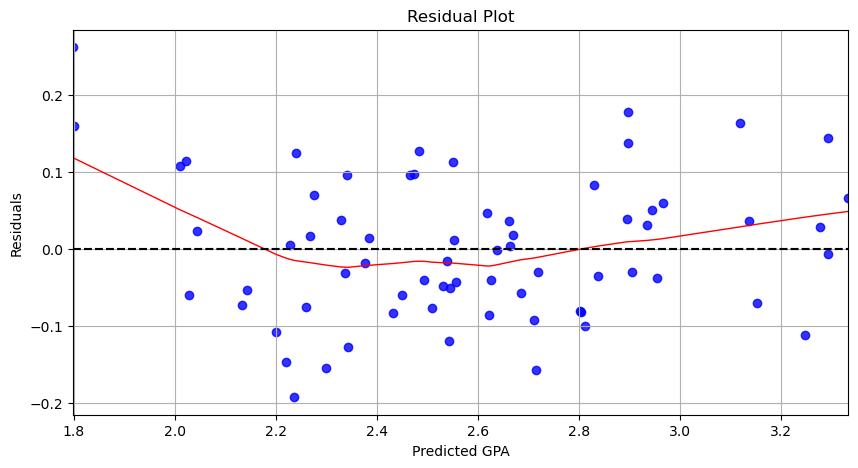

In [187]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, linestyle='--')  # เส้น y = x
plt.title('Scatter Plot of Actual vs Predicted GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.grid()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', 
               line_kws={'color': 'red', 'lw': 1})
plt.axhline(0, linestyle='--', color='black')
plt.title('Residual Plot')
plt.xlabel('Predicted GPA')
plt.ylabel('Residuals')
plt.grid()
plt.show()
